# Main Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
cb_10x = os.path.join("..", "..", "se", "clean-files-ul", "aggr", "agg-cb-10.csv")
cf_10x = os.path.join("..", "..", "se","clean-files-ul", "aggr", "agg-cf-10.csv")
cb_5x = os.path.join("..", "..", "se","clean-files-ul", "aggr", "agg-cb-5.csv")
cf_5x = os.path.join("..", "..", "se","clean-files-ul", "aggr", "agg-cf-5.csv")
cb_1x = os.path.join("..", "..", "se","clean-files-ul", "aggr", "agg-cb-1.csv")
cf_1x = os.path.join("..", "..", "se","clean-files-ul", "aggr", "agg-cf-1.csv")

# Calculations for every file

#### 1x Scenarios

In [10]:
# Read content of the file
df_cb_1 = pd.read_csv(cb_1x)
df_cf_1 = pd.read_csv(cf_1x)

#### 5x Scenarios

In [11]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (bit/s/Hz)"] = df_ue["Mean_SE"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_5 = read_data_by_ue(cb_5x)
dfs_cf_5 = read_data_by_ue(cf_5x)

#### 10x Scenarios

In [12]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (bit/s/Hz)"] = df_ue["Mean_SE"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_10 = read_data_by_ue(cb_10x)
dfs_cf_10 = read_data_by_ue(cf_10x)

# Behavior Graphics 

## 1X Scenarios

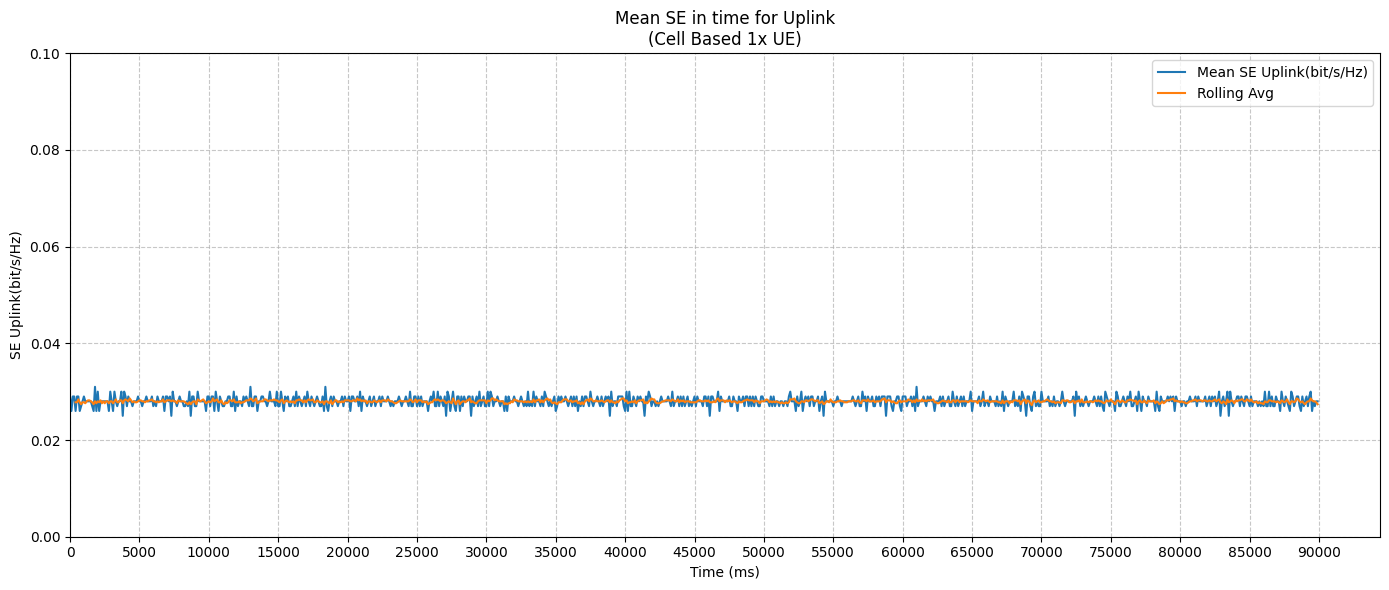

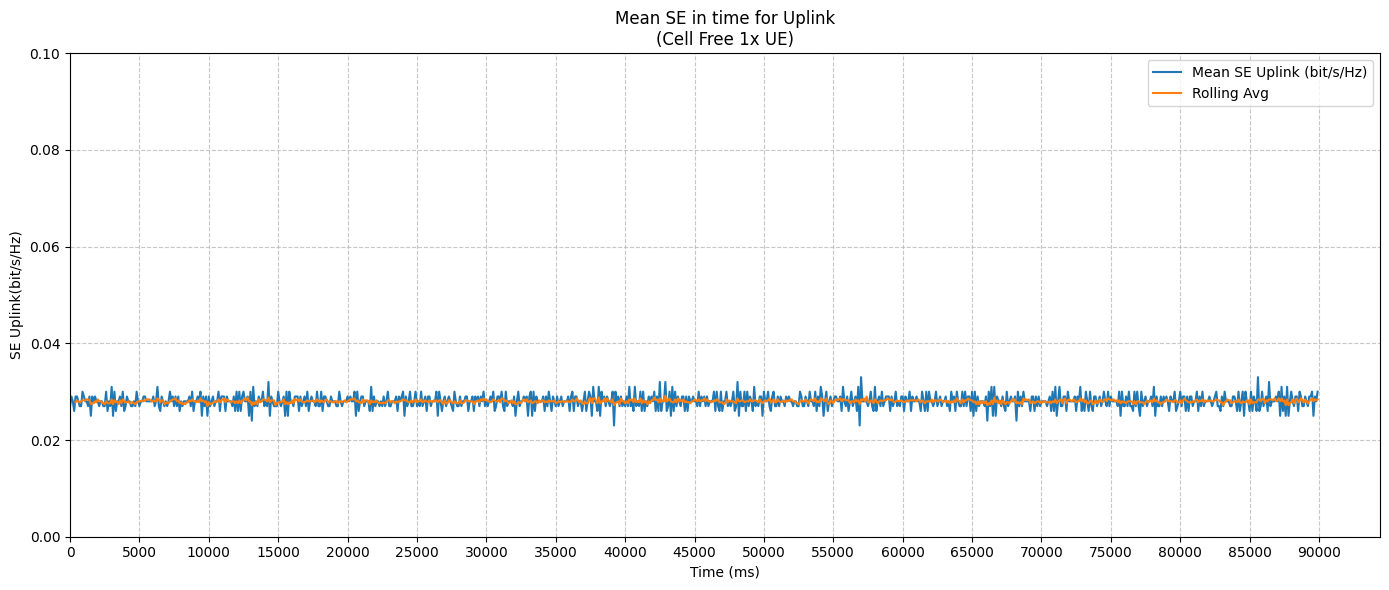

In [13]:
# Round of throughput values to 3 decimal places
df_cb_1["Mean_SE"] = df_cb_1["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_1["Rolling Avg (bit/s/Hz)"] = df_cb_1["Mean_SE"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_SE", data=df_cb_1, label="Mean SE Uplink(bit/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bit/s/Hz)", data=df_cb_1, label="Rolling Avg")
plt.title("Mean SE in time for Uplink\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Uplink(bit/s/Hz)")
plt.legend()
plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Round of throughput values to 3 decimal places
df_cf_1["Mean_SE"] = df_cf_1["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_1["Rolling Avg (bit/s/Hz)"] = df_cf_1["Mean_SE"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_SE", data=df_cf_1, label="Mean SE Uplink (bit/s/Hz)")
sns.lineplot(x="Time_ms", y="Rolling Avg (bit/s/Hz)", data=df_cf_1, label="Rolling Avg")
plt.title("Mean SE in time for Uplink\n(Cell Free 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Uplink(bit/s/Hz)")
plt.legend()

plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
print(df_cb_1["Mean_SE"].describe())
print(df_cf_1["Mean_SE"].describe())

count    900.000000
mean       0.028000
std        0.001082
min        0.025000
25%        0.027000
50%        0.028000
75%        0.029000
max        0.031000
Name: Mean_SE, dtype: float64
count    900.000000
mean       0.028012
std        0.001458
min        0.023000
25%        0.027000
50%        0.028000
75%        0.029000
max        0.033000
Name: Mean_SE, dtype: float64


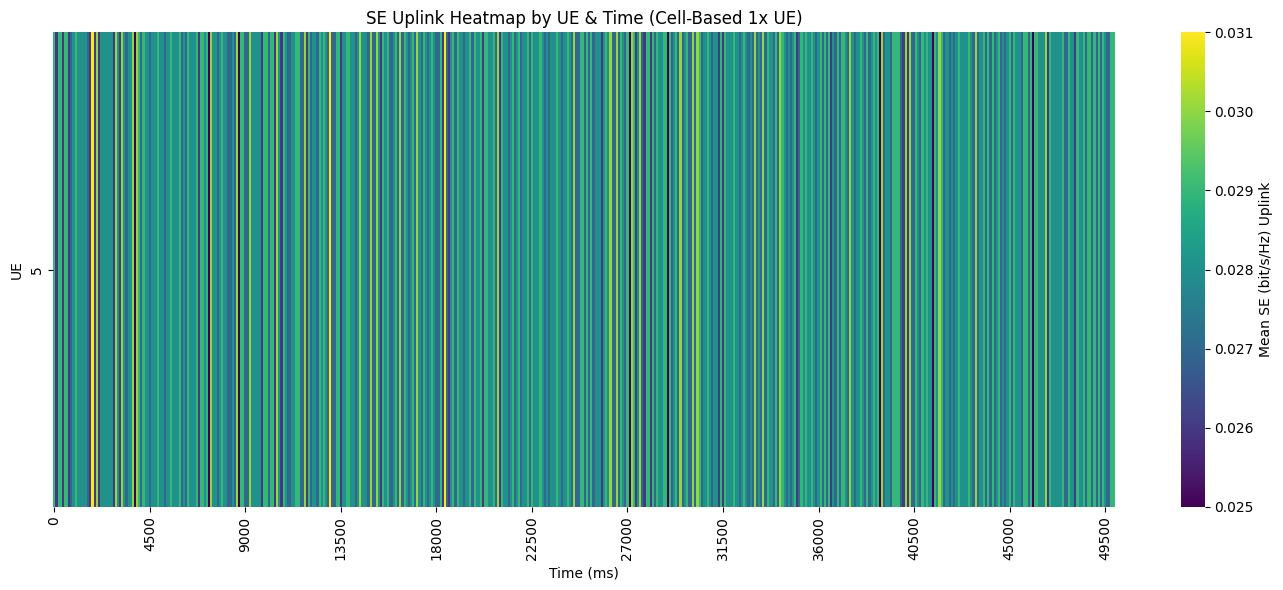

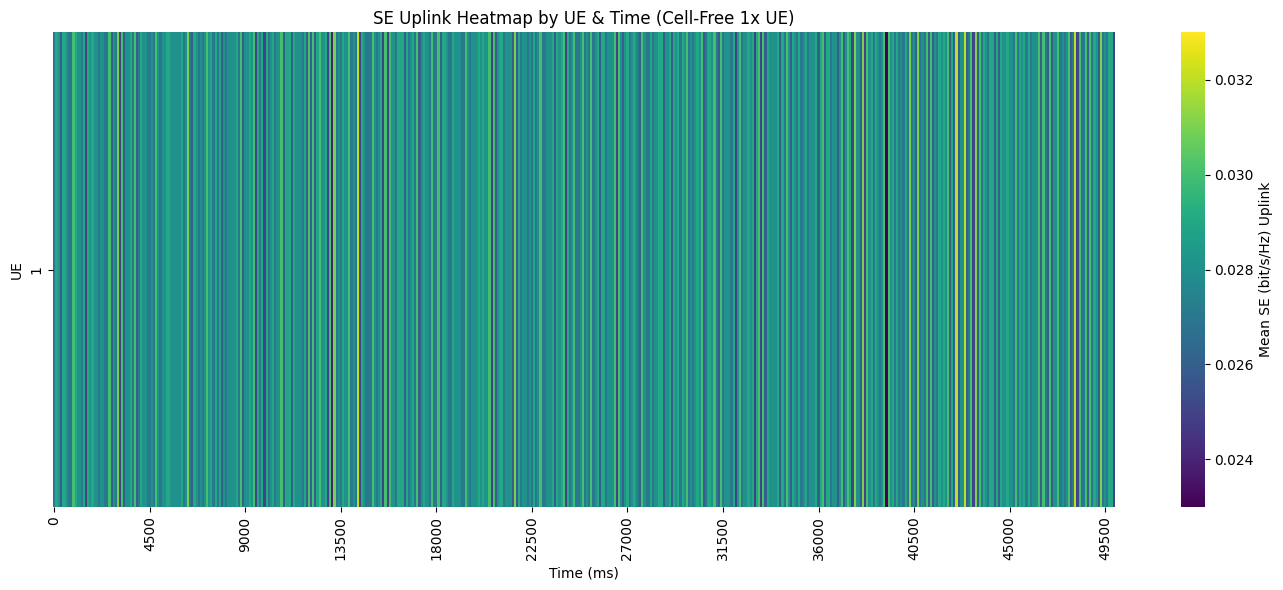

In [15]:
heat_cb = df_cb_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf = df_cf_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean SE (bit/s/Hz) Uplink'})
plt.title("SE Uplink Heatmap by UE & Time (Cell-Based 1x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean SE (bit/s/Hz) Uplink'})
plt.title("SE Uplink Heatmap by UE & Time (Cell-Free 1x UE)")
plt.xlabel("Time (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

## 5X Scenarios

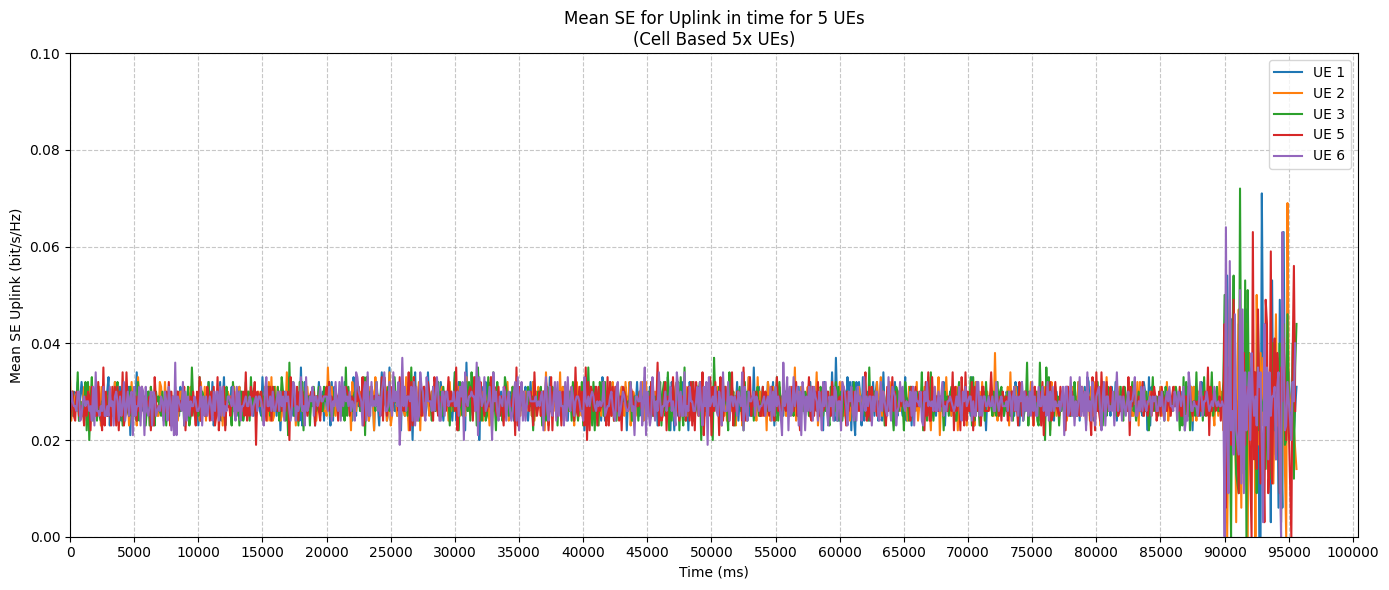

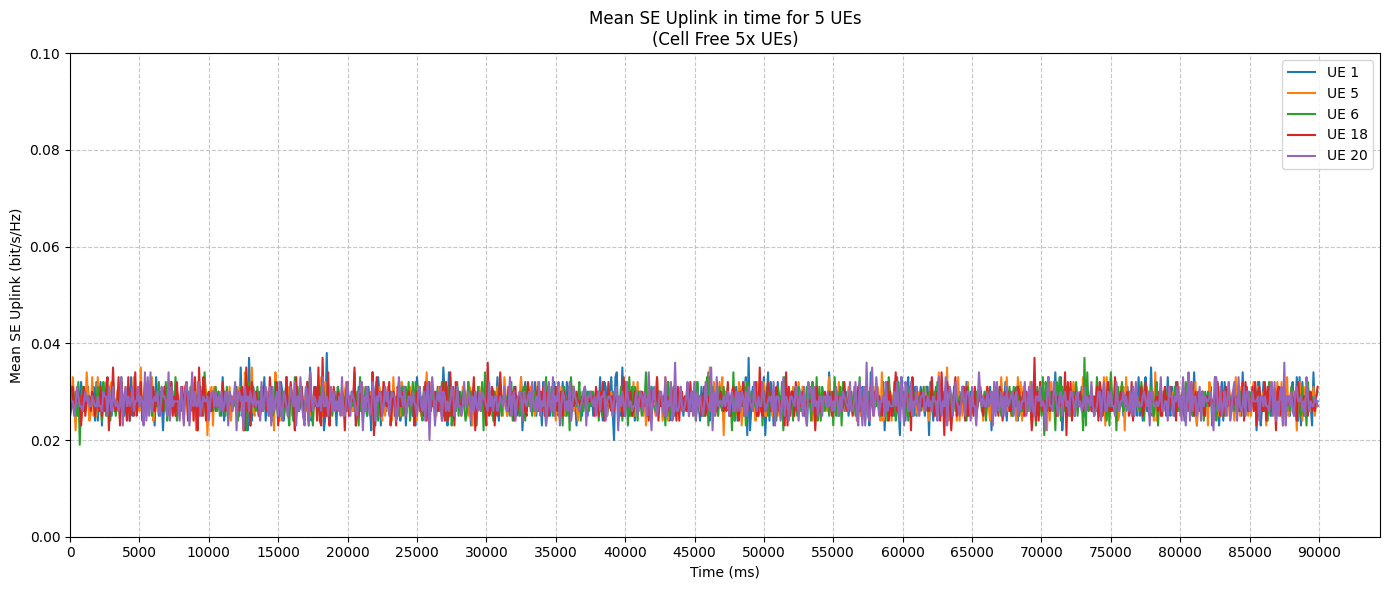

In [16]:
plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cb_5.items():
    dfs_cb_5[ue]["Mean_SE"] = dfs_cb_5[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")

plt.title("Mean SE for Uplink in time for 5 UEs\n(Cell Based 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean SE Uplink (bit/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cf_5.items():
    dfs_cf_5[ue]["Mean_SE"] = dfs_cf_5[ue]["Mean_SE"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")

plt.title("Mean SE Uplink in time for 5 UEs\n(Cell Free 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean SE Uplink (bit/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [17]:
df_cb_5 = pd.read_csv(cb_5x)
df_cf_5 = pd.read_csv(cf_5x)

print(df_cb_5["Mean_SE"].describe())
print(df_cf_5["Mean_SE"].describe())

count    4766.000000
mean        0.027815
std         0.004243
min         0.000000
25%         0.025896
50%         0.027794
75%         0.029686
max         0.071510
Name: Mean_SE, dtype: float64
count    4500.000000
mean        0.028011
std         0.002520
min         0.018602
25%         0.026279
50%         0.027989
75%         0.029653
max         0.038015
Name: Mean_SE, dtype: float64


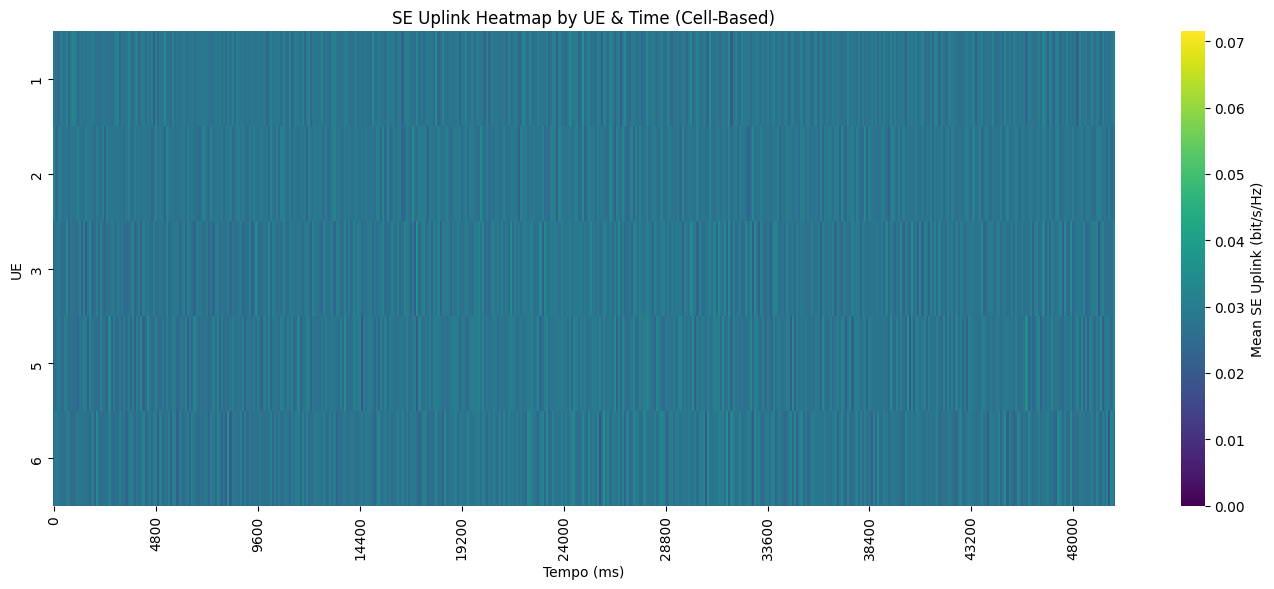

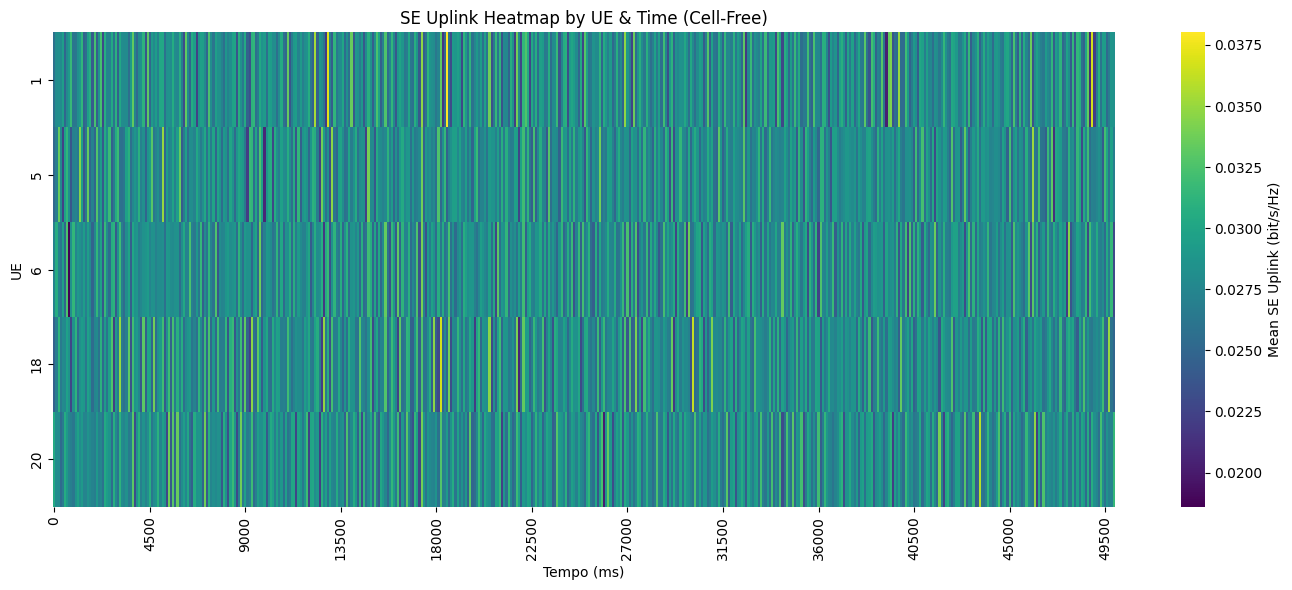

In [18]:
heat_cb = df_cb_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf = df_cf_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bit/s/Hz)'})
plt.title("SE Uplink Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bit/s/Hz)'})
plt.title("SE Uplink Heatmap by UE & Time (Cell-Free)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

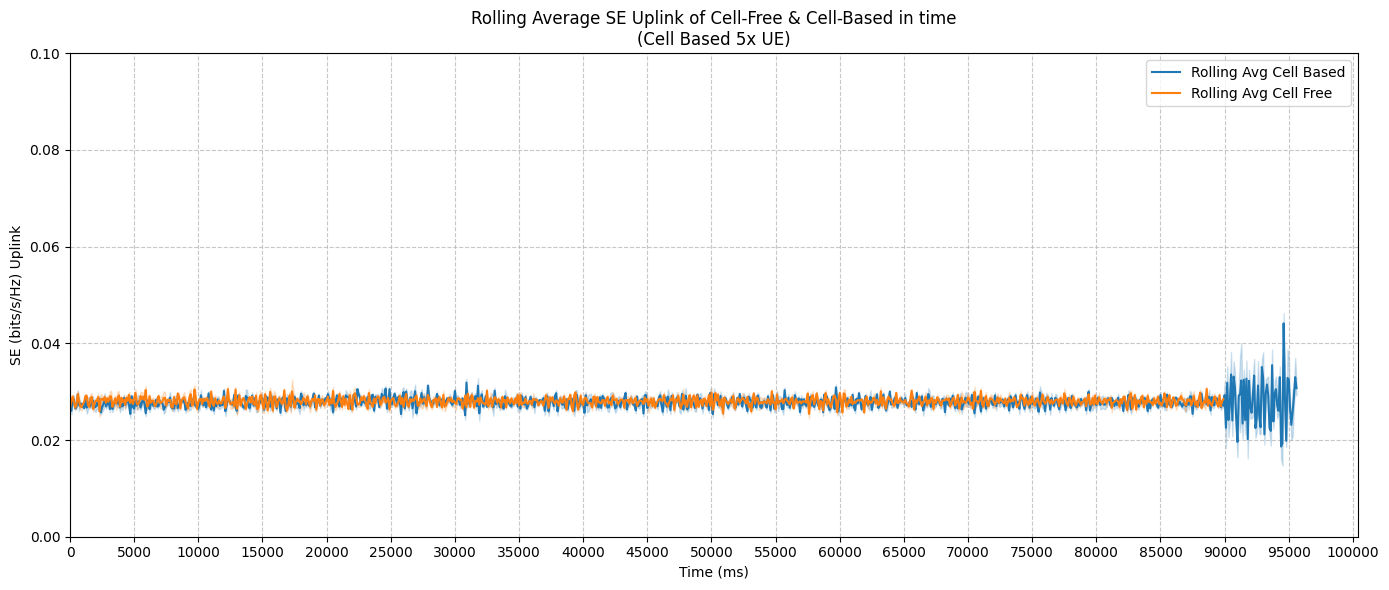

In [19]:
# Round of throughput values to 3 decimal places
df_cb_5["Mean_SE"] = df_cb_5["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_5["Rolling Avg (bits/s/Hz)"] = df_cb_5["Mean_SE"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cf_5["Mean_SE"] = df_cf_5["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_5["Rolling Avg (bits/s/Hz)"] = df_cf_5["Mean_SE"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5, label="Rolling Avg Cell Free")
plt.title("Rolling Average SE Uplink of Cell-Free & Cell-Based in time\n(Cell Based 5x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE (bits/s/Hz) Uplink")
plt.legend()

plt.grid(True)
plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10X Scenarios

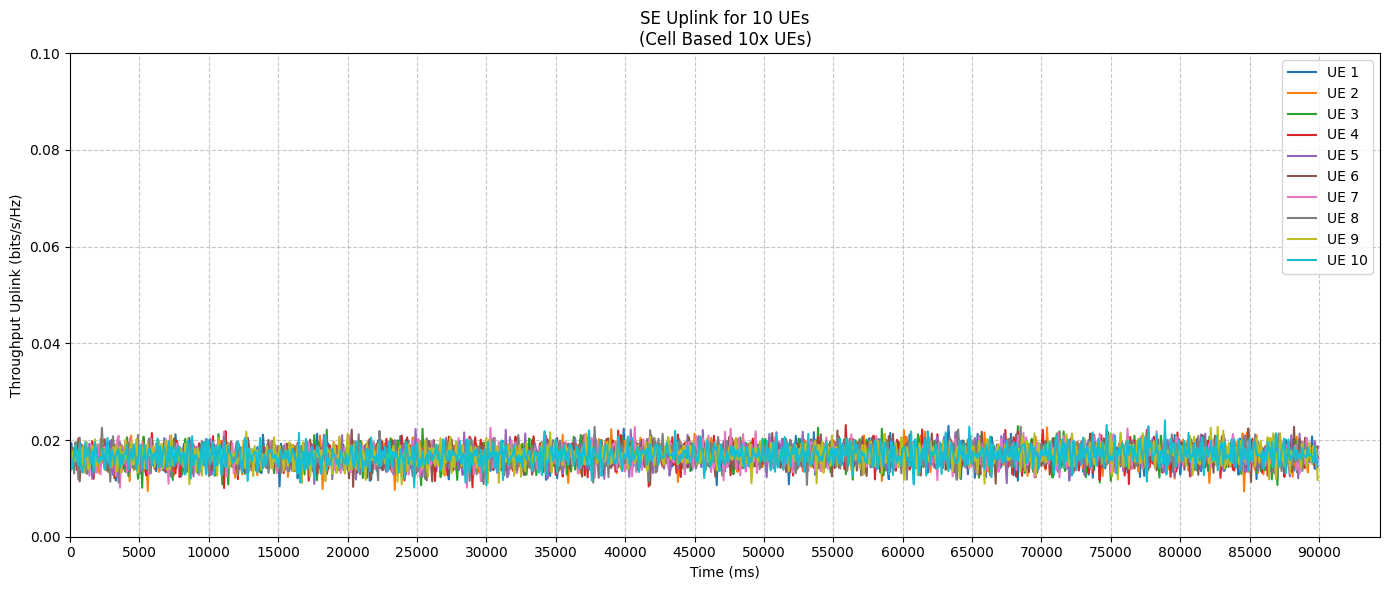

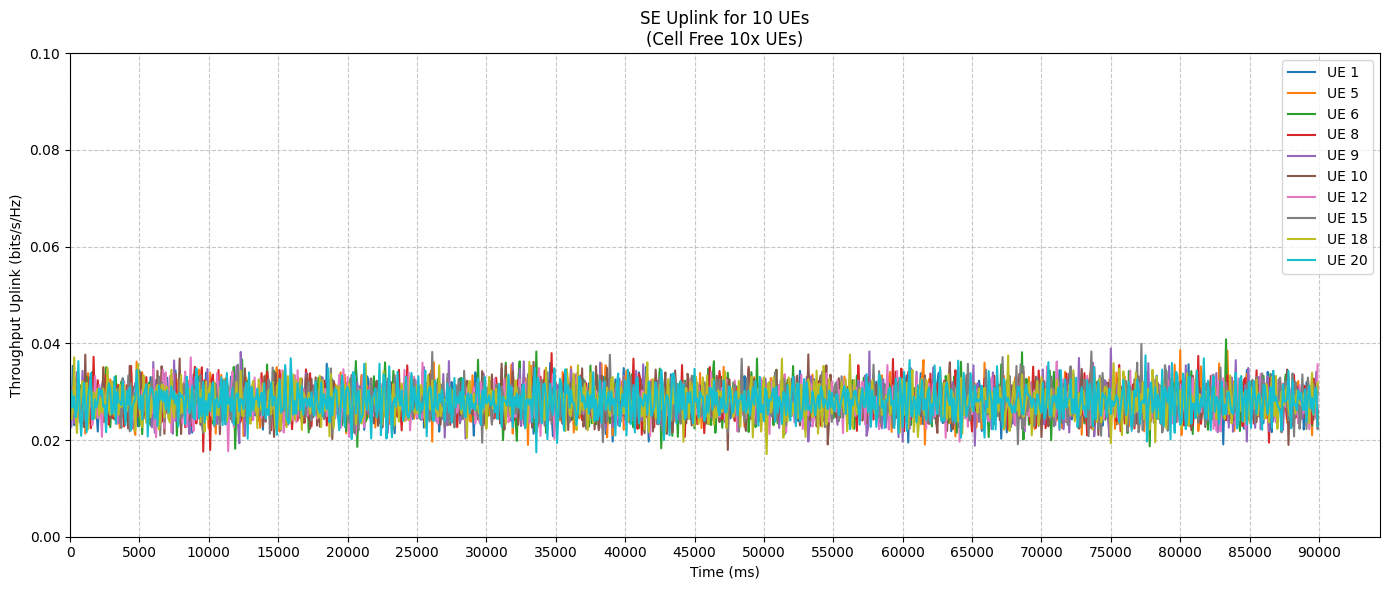

In [20]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb_10.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")
plt.title("SE Uplink for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput Uplink (bits/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf_10.items():
    sns.lineplot(x="Time_ms", y="Mean_SE", data=df, label=f"UE {ue}")
plt.title("SE Uplink for 10 UEs\n(Cell Free 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput Uplink (bits/s/Hz)")
plt.grid(True)
plt.legend()

plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
df_cb_10 = pd.read_csv(cb_10x)
df_cf_10 = pd.read_csv(cf_10x)

print(df_cb_10["Mean_SE"].describe())
print(df_cf_10["Mean_SE"].describe())

count    9000.000000
mean        0.016797
std         0.002021
min         0.009353
25%         0.015450
50%         0.016801
75%         0.018169
max         0.024055
Name: Mean_SE, dtype: float64
count    9000.000000
mean        0.028006
std         0.003120
min         0.017070
25%         0.025896
50%         0.027923
75%         0.030067
max         0.040824
Name: Mean_SE, dtype: float64


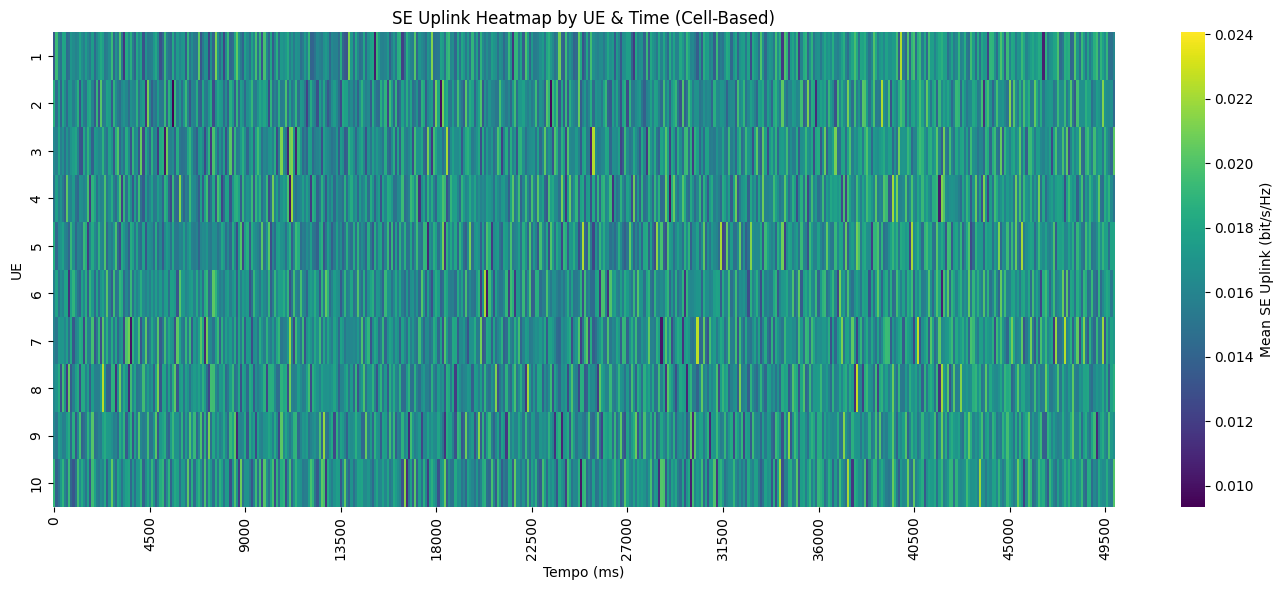

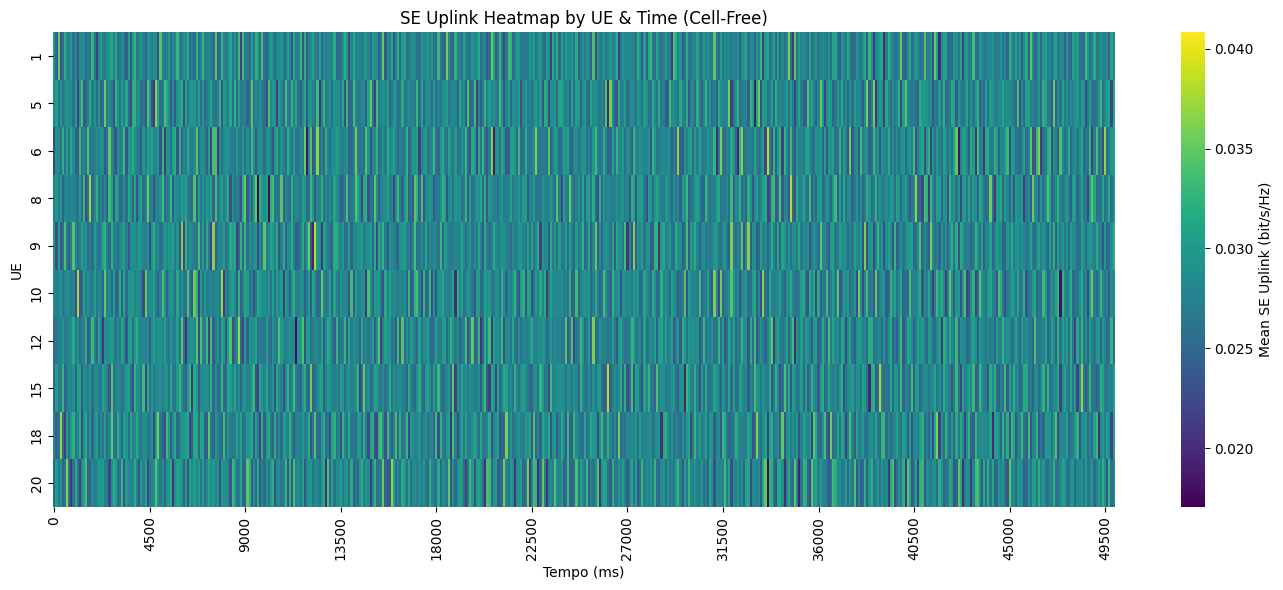

In [22]:

heat_cb = df_cb_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")
heat_cf = df_cf_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_SE")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bit/s/Hz)'})
plt.title("SE Uplink Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean SE Uplink (bit/s/Hz)'})
plt.title("SE Uplink Heatmap by UE & Time (Cell-Free)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

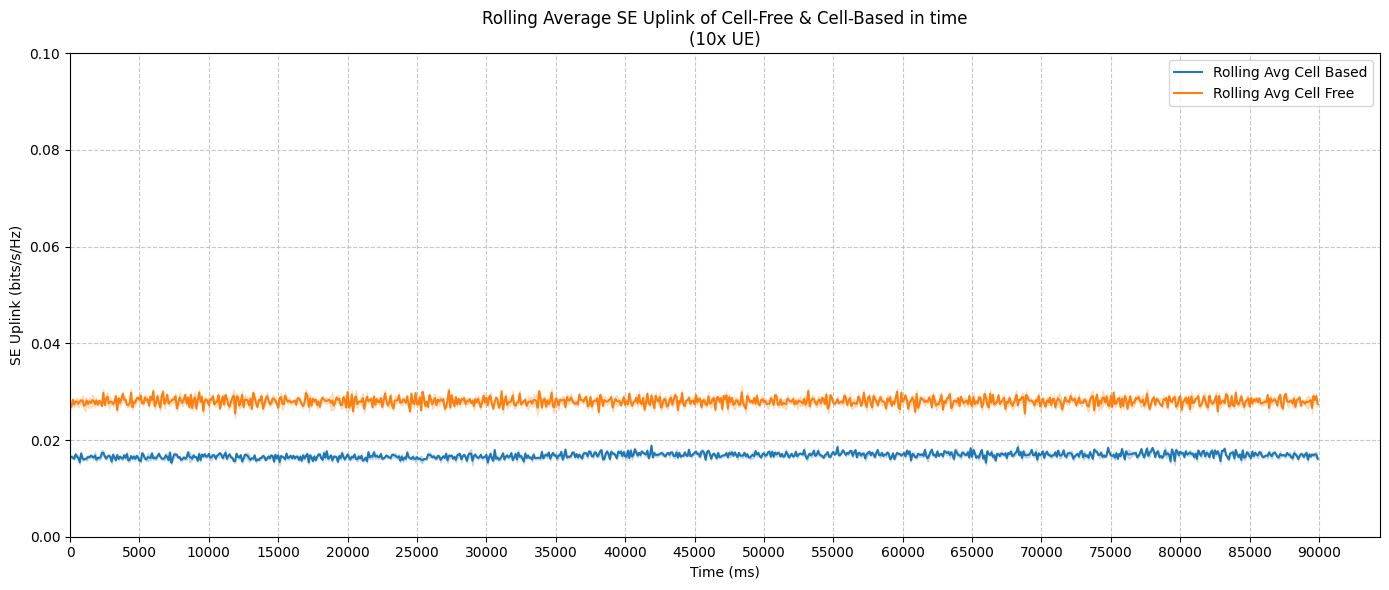

In [23]:
# Round of throughput values to 3 decimal places
df_cb_10["Mean_SE"] = df_cb_10["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cb_10["Rolling Avg (bits/s/Hz)"] = df_cb_10["Mean_SE"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cf_10["Mean_SE"] = df_cf_10["Mean_SE"].round(3)
# Calculate rolling average with a window of 5
df_cf_10["Rolling Avg (bits/s/Hz)"] = df_cf_10["Mean_SE"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10, label="Rolling Avg Cell Free")
plt.title("Rolling Average SE Uplink of Cell-Free & Cell-Based in time\n(10x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("SE Uplink (bits/s/Hz)")
plt.legend()

plt.grid(True)
plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# All Datasets

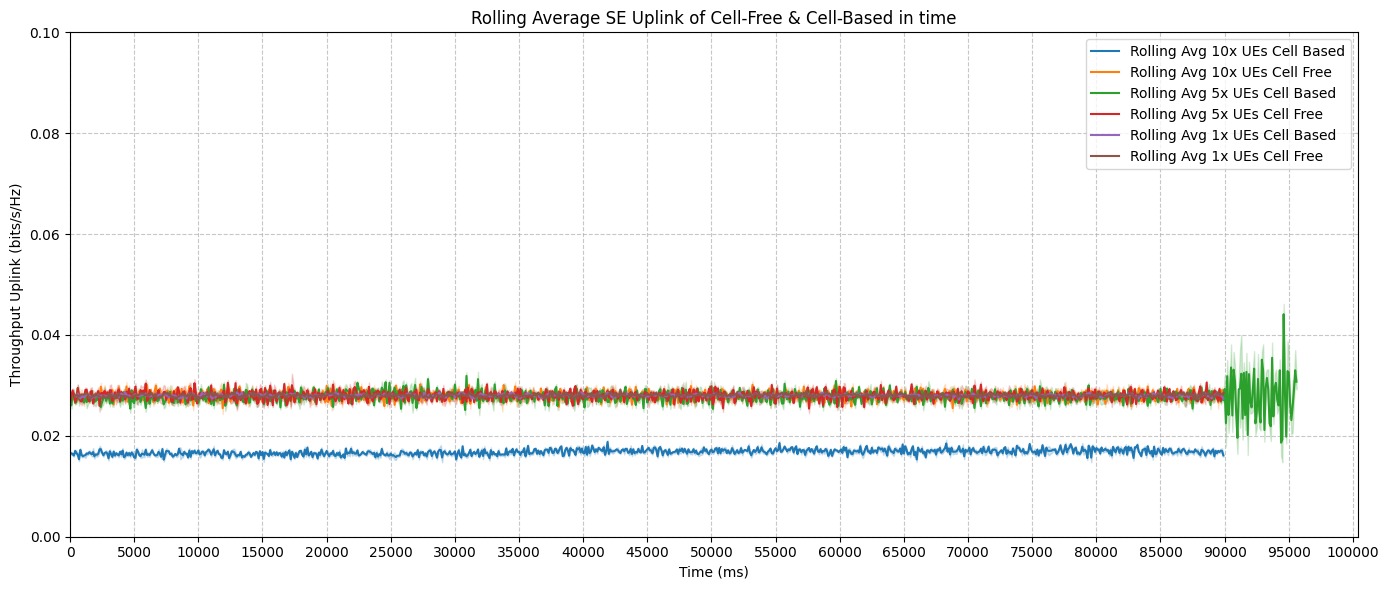

In [25]:
# Round of throughput values to 3 decimal places
df_cb_1["Mean_SE"] = df_cb_1["Mean_SE"].round(3)
df_cb_1["Rolling Avg (bits/s/Hz)"] = df_cb_1["Mean_SE"].rolling(window=5).mean()
df_cf_1["Mean_SE"] = df_cf_1["Mean_SE"].round(3)
df_cf_1["Rolling Avg (bits/s/Hz)"] = df_cf_1["Mean_SE"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cb_5["Mean_SE"] = df_cb_5["Mean_SE"].round(3)
df_cb_5["Rolling Avg (bits/s/Hz)"] = df_cb_5["Mean_SE"].rolling(window=5).mean()
df_cf_5["Mean_SE"] = df_cf_5["Mean_SE"].round(3)
df_cf_5["Rolling Avg (bits/s/Hz)"] = df_cf_5["Mean_SE"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cb_10["Mean_SE"] = df_cb_10["Mean_SE"].round(3)
df_cb_10["Rolling Avg (bits/s/Hz)"] = df_cb_10["Mean_SE"].rolling(window=5).mean()
df_cf_10["Mean_SE"] = df_cf_10["Mean_SE"].round(3)
df_cf_10["Rolling Avg (bits/s/Hz)"] = df_cf_10["Mean_SE"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_10, label="Rolling Avg 10x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_10, label="Rolling Avg 10x UEs Cell Free")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_5, label="Rolling Avg 5x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_5, label="Rolling Avg 5x UEs Cell Free")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cb_1, label="Rolling Avg 1x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (bits/s/Hz)", data=df_cf_1, label="Rolling Avg 1x UEs Cell Free")
plt.title("Rolling Average SE Uplink of Cell-Free & Cell-Based in time")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput Uplink (bits/s/Hz)")
plt.legend()

plt.grid(True)
plt.ylim(0, 0.1)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Boxplots avg se

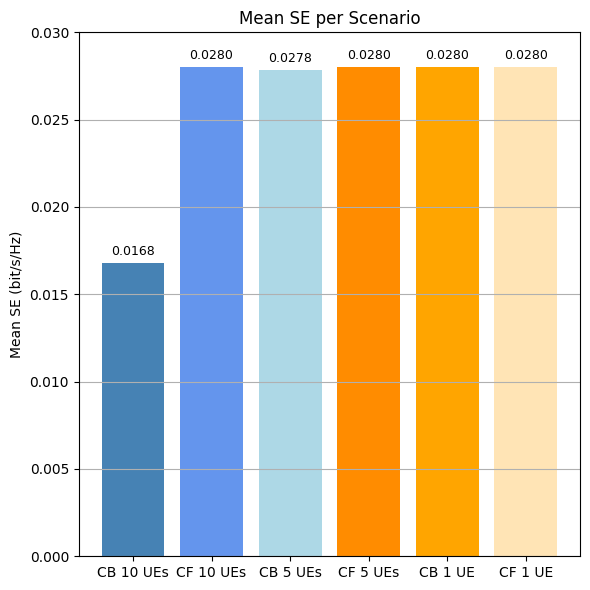

In [52]:
mean_se_total_1 = df_cb_10['Mean_SE'].mean()
mean_se_total_2 = df_cb_5['Mean_SE'].mean()
mean_se_total_3 = df_cb_1['Mean_SE'].mean()
mean_se_total_4 = df_cf_10['Mean_SE'].mean()
mean_se_total_5 = df_cf_5['Mean_SE'].mean()
mean_se_total_6 = df_cf_1['Mean_SE'].mean()

# Lista de valores e labels
mean_values = [
    mean_se_total_1,
    mean_se_total_4,
    mean_se_total_2,
    mean_se_total_5,
    mean_se_total_3,
    mean_se_total_6
]

labels = [
    "CB 10 UEs",
    "CF 10 UEs",
    "CB 5 UEs",
    "CF 5 UEs",
    "CB 1 UE",
    "CF 1 UE"
]

colors = ["steelblue", "cornflowerblue", "lightblue",
          "darkorange", "orange", "moccasin"]

plt.figure(figsize=(6, 6))
plt.bar(labels, mean_values,  color=colors)
plt.title("Mean SE per Scenario")
plt.ylabel("Mean SE (bit/s/Hz)")
plt.ylim(0, 0.03)
plt.grid(axis='y')

for i, v in enumerate(mean_values):
    plt.text(i, v + 0.0003, f"{v:.4f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Stats

## Mean SE Uplink (Mbps)

| Métrica      | CB (1x UEs) | CF (1x UEs) | CB (5x UEs) | CF (5x UEs) | CB (10x UEs) | CF (10x UEs) |
|--------------|-----------|-----------|-------------|-------------|--------------|--------------|
| Count        | 907       | 910       | 4650        | 4655        | 9305         | 9100         |
| Mean         | 1.191     | 1.067     | 1.070       | 1.068       | 0.695        | 1.073        |
| Std          | 0.445     | 0.053     | 0.234       | 0.128       | 0.238        | 0.137        |
| Min          | 0.000     | 0.839     | 0.391       | 0.000       | 0.127        | 0.000        |
| 25%          | 1.036     | 1.033     | 0.982       | 0.998       | 0.560        | 0.988        |
| 50% (Median) | 1.073     | 1.068     | 1.061       | 1.066       | 0.795        | 1.071        |
| 75%          | 1.129     | 1.102     | 1.139       | 1.137       | 0.858        | 1.158        |
| Max          | 5.880     | 1.308     | 2.586       | 2.154       | 1.351        | 2.623        |


## Requirements

|                | VM RAN    | VM CN     | VM UEs      |  VM FlexRIC | 
|--------------  |-----------|-----------|-------------|-------------|
| CPU            | 12        | 2         | 14          | 4           | 
| RAM (GiB)      | 24        | 2         | 20          | 6           | 
| Storage  (GiB) | 76        | 25        | 50          | 50          | 
